In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
SEG = pd.read_csv('../data/SEGMENTS.csv')
SEG.head()

,subjectID,type,part,t_sampling,sample_len,time_len,n_turns,n_peaks_Y,n_peaks_X
0,N-04-1-Char00,norma,part6,0.008,2613,20.904,0.0,0.0,0.0
1,N-920828-Char00,norma,part4,0.017,761,12.937,0.0,0.0,0.0
2,N-920828-Char00,norma,part5,0.017,712,12.104,0.0,0.0,0.0
3,N-04-1-Char00,norma,part7,0.008,9121,72.968,4.0,4.0,4.0
4,N-04-1-Char00,norma,part5,0.008,1974,15.792,0.0,0.0,0.0


Text(0.5, 1.0, '93 parts and their time duration\nblack circle shows where are some turns in record')

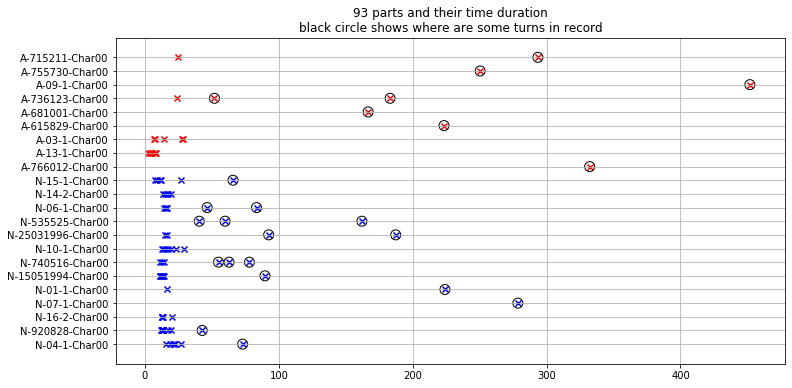

In [10]:
plt.figure(figsize=(12,6))
sub=SEG.loc[SEG['type'] == 'norma']
plt.scatter(x=sub.time_len,y=sub.subjectID,c='b',marker='x')
sub=SEG.loc[SEG['type'] == 'ataxie']
plt.scatter(x=sub.time_len,y=sub.subjectID,c='r',marker='x')
sub=SEG.loc[SEG['n_turns'] > 0]
plt.scatter(x=sub.time_len,y=sub.subjectID,facecolors='none',s=100,edgecolors='k')
plt.grid()
plt.title(str(len(SEG)) + ' parts and their time duration\nblack circle shows where are some turns in record')

In [11]:
A = pd.read_csv('../data/STRAIGHT_STEP_FREQ_CLEAN.csv')
for file in A.File: A.loc[A.File==file,'Subject'] = file.split('Char00')[0]+'Char00'
A.head()

,File,IndexStart,IndexEnd,StepsL,StepsR,Ts,SegLen,TimeLen,StepFreqL,StepFreqR,MaxDir,MinDir,MeanDir,StdDir,Type,Subject
0,N-01-1-Char00part2seg-9_sub_0.csv,58127.0,59961.0,12.0,13.0,0.008,1835.0,14.680,0.817439,0.885559,-65.195771,-134.512166,-80.112084,6.818842,N,N-01-1-Char00
1,A-615829-Char00part1seg-4_sub_1.csv,37215.0,37836.0,3.0,2.0,0.008,622.0,4.976,0.602894,0.401929,151.185526,17.011236,90.361148,31.200162,A,A-615829-Char00
2,N-25031996-Char00part3seg-2_sub_0.csv,24585.0,26738.0,14.0,14.0,0.008,2154.0,17.232,0.812442,0.812442,115.613353,-117.315695,-74.752300,12.243346,N,N-25031996-Char00
3,A-766012-Char00part1seg-1_sub_5.csv,5114.0,6533.0,11.0,10.0,0.017,1420.0,24.140,0.455675,0.414250,31.103251,-71.406641,-20.846895,20.233188,A,A-766012-Char00
4,N-740516-Char00part3seg-0_sub_0.csv,7316.0,8149.0,13.0,12.0,0.017,834.0,14.178,0.916914,0.846382,-35.739444,-136.718920,-108.459980,16.910178,N,N-740516-Char00


In [13]:
print('SEGMENTS:\t'+ str(len(A)) + '\nATAXIE:\t\t' + str(sum(A.Type=='A'))+ '\nNORMA:\t\t' + str(sum(A.Type=='N')))

SEGMENTS:	311
ATAXIE:		99
NORMA:		212


## NOW some nice plots...

### 1] Time duration of segments
If the lenght of walked path was constant -> we will be able to find out velocity. We cannot rely on absolute coordinates, but it's obvious thate there are two populations of gait speed

Text(0.5, 1.0, 'Time duration of segments')

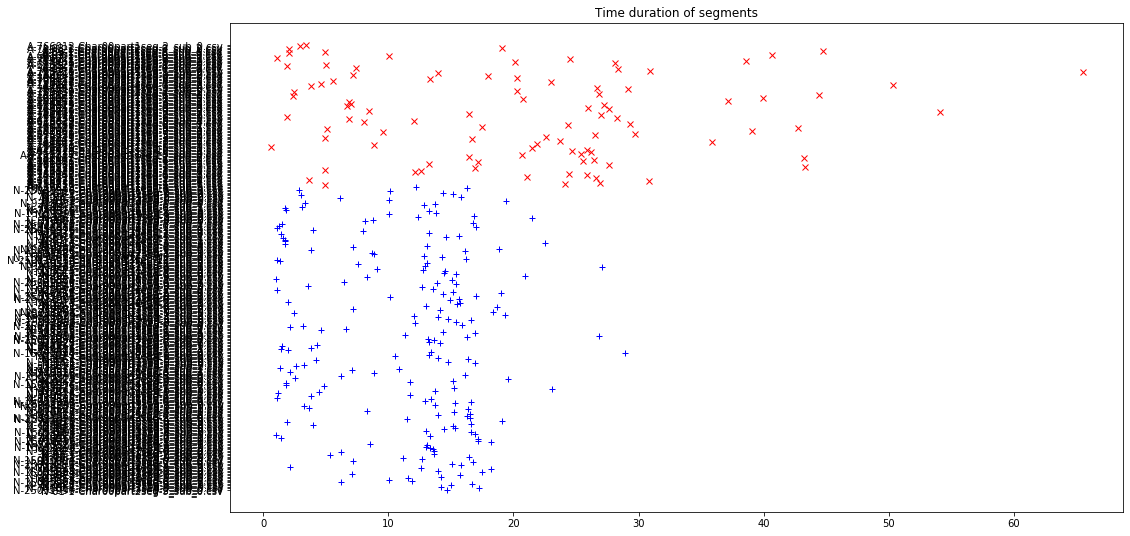

In [14]:
fig = plt.figure(figsize=(16,9))
plt.plot(A.loc[A.Type=='N','TimeLen'],A.loc[A.Type=='N','File'],'b+')
plt.plot(A.loc[A.Type=='A','TimeLen'],A.loc[A.Type=='A','File'],'rx')
plt.title('Time duration of segments')

Type
A    AxesSubplot(0.125,0.125;0.775x0.755)
N    AxesSubplot(0.125,0.125;0.775x0.755)
Name: TimeLen, dtype: object

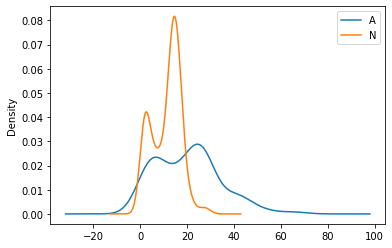

In [15]:
A.groupby(by='Type')['TimeLen'].plot(kind='kde',legend=True)

Text(0.5, 1.0, '311 segments and their time duration\nblack circle shows segments from records with turns')

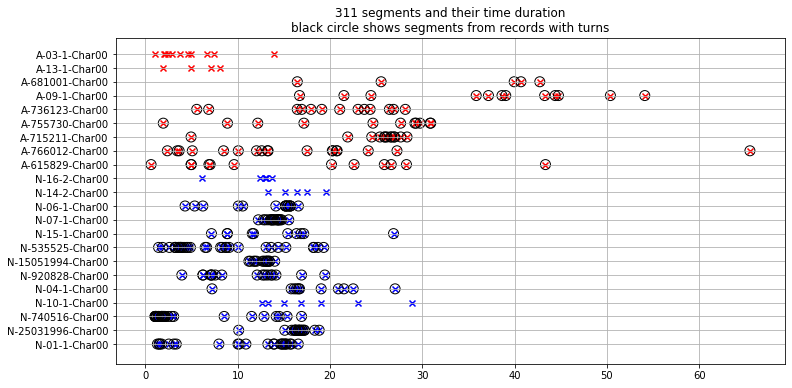

In [16]:
plt.figure(figsize=(12,6))
sub=A.loc[A['Type'] == 'N']
plt.scatter(x=sub.TimeLen,y=sub.Subject,c='b',marker='x')
sub=A.loc[A['Type'] == 'A']
plt.scatter(x=sub.TimeLen,y=sub.Subject,c='r',marker='x')
sub = A[A['Subject'].isin(SEG.loc[SEG['n_turns'] > 0,'subjectID'].values)]
plt.scatter(x=sub.TimeLen,y=sub.Subject,facecolors='none',s=100,edgecolors='k')
plt.grid()
plt.title(str(len(A)) + ' segments and their time duration\nblack circle shows segments from records with turns')

### 2] Number of steps
average number of steps per segment

Text(0.5, 1.0, 'Right foot number of steps histogram')

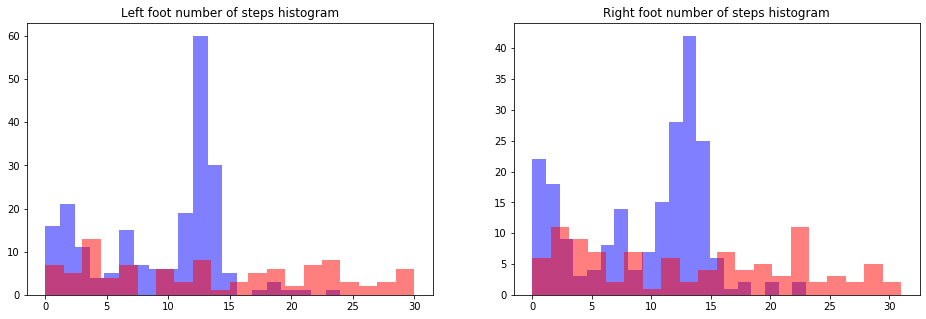

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
ax[0].hist(A.loc[A.Type=='N','StepsL'],color='b',alpha=0.5,bins=20)
ax[0].hist(A.loc[A.Type=='A','StepsL'],color='r',alpha=0.5,bins=20)
ax[0].set_title('Left foot number of steps histogram')

ax[1].hist(A.loc[A.Type=='N','StepsR'],color='b',alpha=0.5,bins=20)
ax[1].hist(A.loc[A.Type=='A','StepsR'],color='r',alpha=0.5,bins=20)
ax[1].set_title('Right foot number of steps histogram')

### 3] Step frequency
Time duration of segment / number of steps

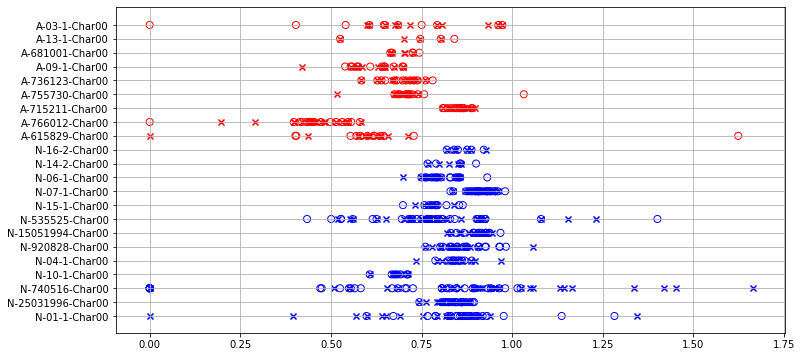

In [18]:
plt.figure(figsize=(12,6))
sub=A.loc[A['Type'] == 'N']
plt.scatter(x=sub.StepFreqL,y=sub.Subject,c='b',marker='x')
plt.scatter(x=sub.StepFreqR,y=sub.Subject,facecolors='none',s=50,edgecolors='b')
sub=A.loc[A['Type'] == 'A']
plt.scatter(x=sub.StepFreqL,y=sub.Subject,c='r',marker='x')
plt.scatter(x=sub.StepFreqR,y=sub.Subject,facecolors='none',s=50,edgecolors='r')
plt.grid()

Text(0.5, 0, 'Frequency [Hz]')

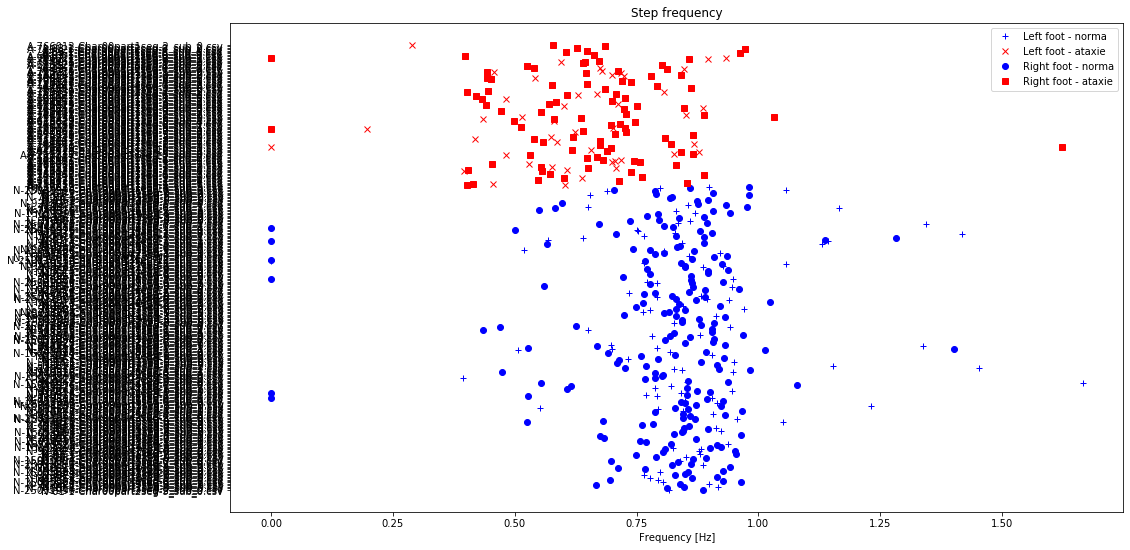

In [19]:
fig = plt.figure(figsize=(16,9))
plt.plot(A.loc[A.Type=='N','StepFreqL'],A.loc[A.Type=='N','File'],'b+')
plt.plot(A.loc[A.Type=='A','StepFreqL'],A.loc[A.Type=='A','File'],'rx')
plt.plot(A.loc[A.Type=='N','StepFreqR'],A.loc[A.Type=='N','File'],'bo')
plt.plot(A.loc[A.Type=='A','StepFreqR'],A.loc[A.Type=='A','File'],'rs')
plt.title('Step frequency')
plt.legend(['Left foot - norma','Left foot - ataxie','Right foot - norma','Right foot - ataxie'])
plt.xlabel('Frequency [Hz]')

Type
A    AxesSubplot(0.125,0.125;0.775x0.755)
N    AxesSubplot(0.125,0.125;0.775x0.755)
Name: StepFreqR, dtype: object

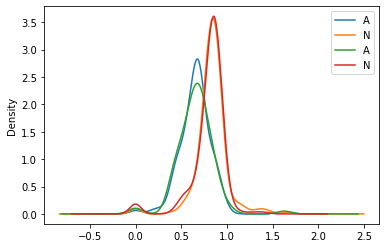

In [20]:
A.groupby(by='Type')['StepFreqL'].plot(kind='kde',legend=True)
A.groupby(by='Type')['StepFreqR'].plot(kind='kde',legend=True)

One individual has bigger step frequency than others -> allways the same (N-740516):

In [21]:
A.loc[(A.StepFreqR > 1.5) | (A.StepFreqL > 1.5)]

,File,IndexStart,IndexEnd,StepsL,StepsR,Ts,SegLen,TimeLen,StepFreqL,StepFreqR,MaxDir,MinDir,MeanDir,StdDir,Type,Subject
95,A-615829-Char00part1seg-5_sub_0.csv,37836.0,37912.0,0.0,1.0,0.008,77.0,0.616,0.000000,1.623377,163.740280,-85.279381,29.314456,96.436197,A,A-615829-Char00
105,N-740516-Char00part4seg-1_sub_0.csv,11888.0,11993.0,3.0,1.0,0.017,106.0,1.802,1.664817,0.554939,85.546934,-88.925342,28.488046,45.631738,N,N-740516-Char00


ATAXIA PATIENTS - smaller steps -> bigger number of steps, it's okay

In [22]:
A.loc[(A.StepsL > 30) | (A.StepsR > 30),:]

,File,IndexStart,IndexEnd,StepsL,StepsR,Ts,SegLen,TimeLen,StepFreqL,StepFreqR,MaxDir,MinDir,MeanDir,StdDir,Type,Subject
154,A-681001-Char00part1seg-2_sub_0.csv,5472.0,7984.0,30.0,31.0,0.017,2513.0,42.721,0.702231,0.725638,95.577939,-134.75702,-77.455023,33.40116,A,A-681001-Char00


Someone was probably lazy to walk all the way back and forth

In [23]:
A.loc[(A.StepsL < 10) | (A.StepsR < 10),:]

,File,IndexStart,IndexEnd,StepsL,StepsR,Ts,SegLen,TimeLen,StepFreqL,StepFreqR,MaxDir,MinDir,MeanDir,StdDir,Type,Subject
1,A-615829-Char00part1seg-4_sub_1.csv,37215.0,37836.0,3.0,2.0,0.008,622.0,4.976,0.602894,0.401929,151.185526,17.011236,90.361148,31.200162,A,A-615829-Char00
7,N-920828-Char00part7seg-0_sub_1.csv,12824.0,13189.0,5.0,6.0,0.017,366.0,6.222,0.803600,0.964320,-64.028933,-93.509362,-76.017531,5.732145,N,N-920828-Char00
10,N-535525-Char00part2seg-0_sub_0.csv,13320.0,13911.0,8.0,7.0,0.017,592.0,10.064,0.794913,0.695548,92.736669,36.164266,73.684777,10.352379,N,N-535525-Char00
11,N-15-1-Char00part6seg-0_sub_0.csv,33270.0,33950.0,9.0,10.0,0.017,681.0,11.577,0.777403,0.863782,107.844220,77.419543,95.211264,5.744683,N,N-15-1-Char00
15,N-920828-Char00part7seg-0_sub_0.csv,12395.0,12810.0,6.0,6.0,0.017,416.0,7.072,0.848416,0.848416,-18.651620,-86.777994,-72.853318,10.983986,N,N-920828-Char00
18,A-766012-Char00part1seg-1_sub_4.csv,4624.0,4838.0,2.0,2.0,0.017,215.0,3.655,0.547196,0.547196,0.489811,-60.106521,-29.842494,17.309410,A,A-766012-Char00
21,N-10-1-Char00part5seg-0_sub_0.csv,36307.0,37050.0,9.0,9.0,0.017,744.0,12.648,0.711575,0.711575,-47.879445,-85.769167,-71.784628,7.935108,N,N-10-1-Char00
22,N-740516-Char00part4seg-0_sub_0.csv,11603.0,11727.0,2.0,2.0,0.017,125.0,2.125,0.941176,0.941176,-96.511332,-123.920620,-110.932894,6.756917,N,N-740516-Char00
27,N-15-1-Char00part1seg-0_sub_0.csv,23820.0,24240.0,6.0,5.0,0.017,421.0,7.157,0.838340,0.698617,115.873090,77.792459,107.371740,5.233727,N,N-15-1-Char00
32,N-06-1-Char00part4seg-0_sub_0.csv,41688.0,42354.0,4.0,4.0,0.008,667.0,5.336,0.749625,0.749625,109.208575,-18.966205,88.666235,29.104902,N,N-06-1-Char00


# SVM CLASSIFIER

In [24]:
from sklearn.model_selection import train_test_split

XA = np.array([A.loc[A.Type == 'A','StepFreqL'].values, A.loc[A.Type == 'A','StepFreqR'].values]).transpose()  
XN = np.array([A.loc[A.Type == 'N','StepFreqL'].values, A.loc[A.Type == 'N','StepFreqR'].values]).transpose()  

yA = np.ones((len(XA),1))
yN = np.zeros((len(XN),1))

X_trainA, X_testA, y_trainA, y_testA = train_test_split(XA, yA, random_state=42)
X_trainN, X_testN, y_trainN, y_testN = train_test_split(XN, yN, random_state=42)

X = np.append(X_trainA,X_trainN,axis=0)
y = np.append(y_trainA,y_trainN)

In [25]:
def plot_confusion_matrix(cm, pos, pos2, ax, title='Confusion matrix', cmap=plt.cm.Oranges):
    ax[pos,pos2].imshow(cm, interpolation='nearest', cmap=cmap)
    #ax[pos,2].colorbar()
    tick_marks = np.arange(2)
    ax[pos,pos2].set_xticks(tick_marks)
    axx = plt.gca()
    axx.set_xticklabels((axx.get_xticks() +1).astype(str))
    ax[pos,pos2].set_yticks(tick_marks)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax[pos,pos2].text(j, i, str(cm[i, j]))#,
#                 horizontalalignment="center"),
#                 color="white" if cm[i, j] > thresh else "black")

    ax[pos,pos2].set_ylabel('True label')
    ax[pos,pos2].set_xlabel('Predicted label')

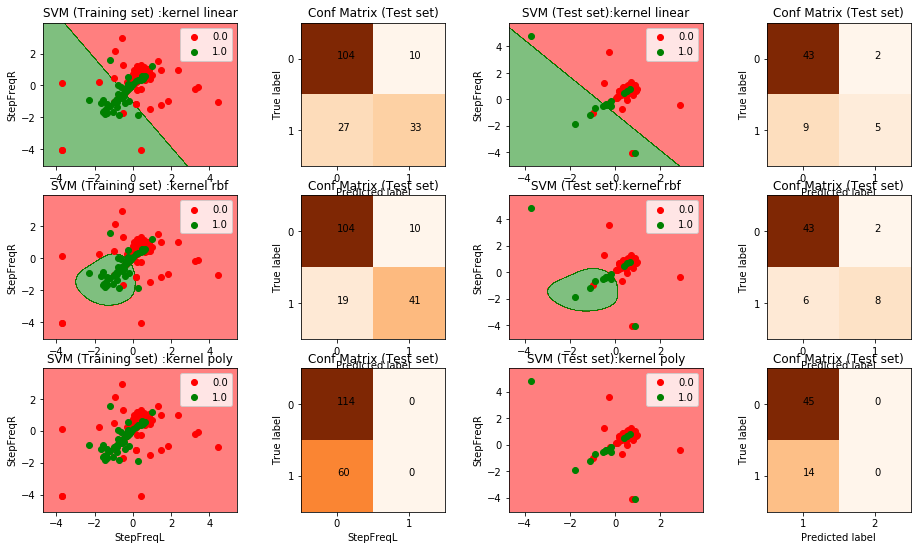

In [26]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
# Splitting the dataset into the Training set and Test set
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
import itertools

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

fig, ax = plt.subplots(3, 4, figsize=(16,9))
pos = 0
for kernel in ('linear', 'rbf', 'poly'):
    # Fitting SVM to the Training set
    classifier = SVC(kernel = kernel, random_state = 0)
    classifier.fit(X_train, y_train)

    # Visualising the Training set results
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    ax[pos,0].contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.5, cmap = ListedColormap(('red', 'green')))
    ax[pos,0].set_xlim(X1.min(), X1.max())
    ax[pos,0].set_ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        ax[pos,0].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    ax[pos,0].set_title('SVM (Training set) '+ ':kernel ' + kernel)
    #ax[pos,0].set_xlabel('StepFreqL')
    ax[pos,0].set_ylabel('StepFreqR')
    ax[pos,0].legend()
    
    # Predicting the Train set results
    y_pred_train = classifier.predict(X_train)
    # Making the Confusion Matrix    
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    plot_confusion_matrix(cm_train, pos, 1, ax)
    ax[pos,1].set_title('Conf Matrix (Test set)')

    # Visualising the Test set results
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    ax[pos,2].contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.5, cmap = ListedColormap(('red', 'green')))
    ax[pos,2].set_xlim(X1.min(), X1.max())
    ax[pos,2].set_ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        ax[pos,2].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    ax[pos,2].set_title('SVM (Test set)' + ':kernel ' + kernel)
    #ax[pos,1].set_xlabel('StepFreqL')
    ax[pos,2].set_ylabel('StepFreqR')
    ax[pos,2].legend()
    
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    # Making the Confusion Matrix    
    cm = confusion_matrix(y_test, y_pred)
    
    plot_confusion_matrix(cm, pos, 3, ax)
    ax[pos,3].set_title('Conf Matrix (Test set)')
    pos +=1
    
ax[2,0].set_xlabel('StepFreqL')
ax[2,1].set_xlabel('StepFreqL')
plt.show()